# Sheet 2: Comparing the **relative abundances** at the *Phylum* level of the three conditions: LE, NL, HS

The data consists of **three folders**, each corresponding to a different sample type. Within each folder, there is one .xls file for each sample. Each file comprises a dataset organized into three columns:

1. **Domain**
2. **Phylum** or **Genus**
3. **Count**

The objective is to calculate the **relative abundances** of each phylum or genus separately for each sample type, and then visually compare these abundances by plotting them together to identify any differences.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

folder_path_LE = r"C:\Users\Ilaria Coratella\OneDrive - Universiteit Utrecht\Sapienza University - Ila\Internship Atopic Dermatitis\revised_data\2023.05.03 - AD Lesion"
folder_path_NL = r"C:\Users\Ilaria Coratella\OneDrive - Universiteit Utrecht\Sapienza University - Ila\Internship Atopic Dermatitis\revised_data\2023.05.03 - AD Untreated"
folder_path_HS = r"C:\Users\Ilaria Coratella\OneDrive - Universiteit Utrecht\Sapienza University - Ila\Internship Atopic Dermatitis\revised_data\2023.05.03 - HS"

### **Step1**: *Concatenate the sample datasets*

In [2]:
def concat_excel_files(folder_path):
    dfs = []
    
    column_names = ['Domain', 'Phylum', 'Count']

    # Loop over the files to import them one by one
    for filename in os.listdir(folder_path):
        if filename.endswith('.xls'):
            file_path = os.path.join(folder_path, filename)
            # Read the first sheet of the excel file, because I am working at the Phylum level
            df = pd.read_excel(file_path, sheet_name='Phylum', header=None, names=column_names)
            # Add the 'sampleId' column with the filename
            df['SampleId'] = os.path.splitext(filename)[0]
            dfs.append(df)

    # Concatenate all dataframes into a single dataframe and rearrange
    final_df = pd.concat(dfs, ignore_index=True)
    cols = ['SampleId'] + [col for col in final_df.columns if col != 'SampleId']
    final_df = final_df[cols]
    return final_df

final_df_LE = concat_excel_files(folder_path_LE)
final_df_NL = concat_excel_files(folder_path_NL)
final_df_HS = concat_excel_files(folder_path_HS)

### **Step 2**: *Compute the relative abundances*

In [3]:
tot_values_LE = final_df_LE.groupby(by=['Phylum'])['Count'].sum()/final_df_LE['Count'].sum()
tot_values_NL = final_df_NL.groupby(by=['Phylum'])['Count'].sum()/final_df_NL['Count'].sum()
tot_values_HS = final_df_HS.groupby(by=['Phylum'])['Count'].sum()/final_df_HS['Count'].sum()

In [4]:
all_phyla = tot_values_LE.index.union(tot_values_NL.index).union(tot_values_HS.index)

# Reindex each series to include all phyla (might different among sample types, want to be sure to include them all)
tot_values_LE = tot_values_LE.reindex(all_phyla, fill_value=0)
tot_values_NL = tot_values_NL.reindex(all_phyla, fill_value=0)
tot_values_HS = tot_values_HS.reindex(all_phyla, fill_value=0)

### **Step 3**: *Concatenate the relative abundances of the three sample types*

In [5]:
tot_values_LE = tot_values_LE.reset_index()
tot_values_NL = tot_values_NL.reset_index()
tot_values_HS = tot_values_HS.reset_index()

tot_values_LE.columns = ['Phylum', 'LE']
tot_values_NL.columns = ['Phylum', 'NL']
tot_values_HS.columns = ['Phylum', 'HS']

# Merge these DataFrames on the 'Phylum' column to align all the data
data = tot_values_LE.merge(tot_values_NL, on='Phylum', how='outer').merge(tot_values_HS, on='Phylum', how='outer')
data

,Phylum,LE,NL,HS
0,Acidobacteria,4.420999e-06,0.000019,0.000338
1,Actinobacteria,1.647167e-01,0.115669,0.292875
2,Armatimonadetes,2.086712e-04,0.000015,0.000227
3,Bacteroidetes,5.295473e-03,0.032592,0.005089
4,Candidatus Saccharibacteria,7.798643e-04,0.000435,0.000164
5,Chloroflexi,2.210500e-05,0.000093,0.000047
6,Crenarchaeota,2.829440e-05,0.000031,0.000044
7,Cyanobacteria Chloroplast,2.748093e-03,0.018731,0.020712
8,Deinococcus-Thermus,5.682311e-02,0.001091,0.003115
9,Elusimicrobia,8.841999e-07,0.000000,0.000000


In [6]:
data_transpose = data.T

# To set the name of the columns
data_transpose.columns = data_transpose.iloc[0]

# To remove the now redundant column
data_transpose = data_transpose.drop(data_transpose.index[0])
data_transpose

Phylum,Acidobacteria,Actinobacteria,Armatimonadetes,Bacteroidetes,Candidatus Saccharibacteria,Chloroflexi,Crenarchaeota,Cyanobacteria Chloroplast,Deinococcus-Thermus,Elusimicrobia,...,Fusobacteria,Gemmatimonadetes,Planctomycetes,Proteobacteria,Tenericutes,Thermotogae,Verrucomicrobia,candidate division WPS-2,unclassified Archaea,unclassified Bacteria
LE,0.000004,0.164717,0.000209,0.005295,0.00078,0.000022,0.000028,0.002748,0.056823,0.000001,...,0.000119,0.000202,0.000706,0.483571,0.000002,0.0,0.000012,0.0,0.000042,0.046459
NL,0.000019,0.115669,0.000015,0.032592,0.000435,0.000093,0.000031,0.018731,0.001091,0.0,...,0.001351,0.0,0.000282,0.664658,0.000001,0.0,0.000019,0.0,0.000044,0.048905
HS,0.000338,0.292875,0.000227,0.005089,0.000164,0.000047,0.000044,0.020712,0.003115,0.0,...,0.001618,0.0,0.000002,0.357778,0.0,0.000108,0.000075,0.000031,0.000059,0.05348


In [7]:
data_transpose.sum(axis = 1)

LE    1.0
NL    1.0
HS    1.0
dtype: object

### Finally plot!

In [8]:
palette = ["#a0e85b", "#30766a", "#36edd3", "#359721", "#a2e0dd", "#333a9e", "#1a86e3", "#e3a0fa", "#8c0250", "#fa41c7", "#4f8c9d", "#8c0da4", "#d5d0fa", "#5f5c6f", "#562fff", "#3ff44c", "#6e390d", "#fca552", "#d6061a", "#fb899b", "#d6da7d"]

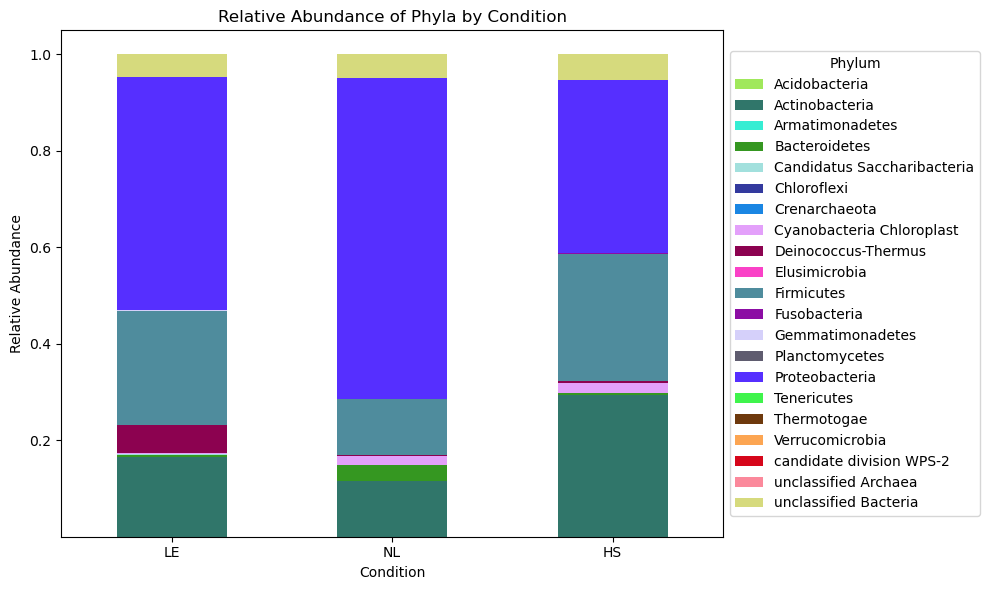

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
data_transpose.plot(kind='bar', stacked=True, ax=ax, color=palette)

ax.set_xlabel('Condition')
ax.set_ylabel('Relative Abundance')
ax.set_title('Relative Abundance of Phyla by Condition')

plt.xticks(rotation=0)

ax.legend(title='Phylum', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()